In [97]:
import typing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
def batch_gradient_ascent(
    params: np.ndarray,
    X_train: np.ndarray,
    y_train: np.ndarray,
    hypothesis_func: typing.Callable[[np.ndarray, np.ndarray], np.floating],
    *,
    learning_rate: float = 0.01,
    maxiter: int = 1000
) -> np.ndarray:
    """
    Implements Batch Gradient Ascent using the Least Mean Squares cost function.
    (Widrow-Hoff learning rule).
    """

    prev = params.copy()
    converged = False
    iters = 0

    while not converged:
        # Update rule per feature parameter

        # for j, param in enumerate(params):
        #     params[j] = param + (learning_rate * (sum(
        #         ((y_train[i] - hypothesis_func(params, X_train[i])) * (1 if j==0 else X_train[i][j-1])) for i in range(len(X_train))
        #     )))

        
        # Vector form
        params = params + (learning_rate * (sum(
            ((y_train[i] - hypothesis_func(params, X_train[i])) * (np.array([1, *X_train[i]]))) for i in range(len(X_train))
        )))


        if np.array_equal(prev, params):
            converged = True
            break
        else:
            prev = params.copy()
            iters += 1
            if iters == maxiter:
                break

    return params

In [135]:
class LogisticRegression:
    def __init__(self, maxiter: int):
        self.params = np.array([]) # intentional: empty
        self._maxiter = maxiter

    def _predict(self, params: np.ndarray, X: np.ndarray) -> np.floating:
        # This is also a possibile variation.
        # X_new = np.array([1, *X])
        # return np.dot(params, X_new)

        mul = np.dot(X, params[1:]) + params[0]
        return 1 / (1 + np.exp(-mul))
    
    def predict(self, X: np.ndarray):
        return self._predict(self.params, X)

    def fit(
        self,
        X_train: np.ndarray,
        y_train: np.ndarray
    ):
        initial = np.zeros(len(X_train[0]) + 1)
        self.params = batch_gradient_ascent(
            initial,
            X_train,
            y_train,
            self._predict,
            maxiter=self._maxiter
        )


In [107]:
df = pd.read_csv("../datasets/score.csv")
X, y = df[["Hours"]].to_numpy(), df["Passed"].to_numpy()

In [148]:
model = LogisticRegression(maxiter=100_000)
model.fit(X, y)

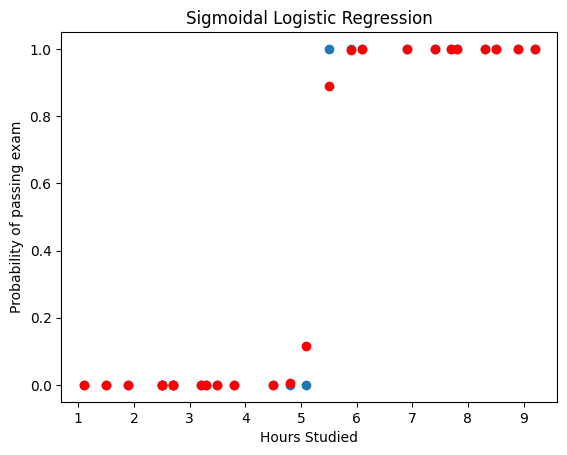

In [146]:
y_pred = [model.predict(row) for row in X]

plt.scatter(X, y)
plt.scatter(X, y_pred, color="red")

plt.xlabel("Hours Studied")
plt.ylabel("Probability of passing exam")
plt.title("Sigmoidal Logistic Regression")

plt.show()